<a href="https://colab.research.google.com/github/EdmarBortoletto/Ciencias-de-Dados/blob/main/Selecao_atributos_Feto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low Variance
## Accuracy = 0.8808

In [ ]:
import pandas as pd
base_fetal = pd.read_csv('fetal_health.csv')
base_fetal

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
colunas = base_fetal.columns[:-1]
colunas

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [ ]:
X_census = base_fetal.iloc[:, 0:21].values
y_census = base_fetal.iloc[:, 21].values

In [ ]:
X_census

array([[1.20e+02, 0.00e+00, 0.00e+00, ..., 1.21e+02, 7.30e+01, 1.00e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, ..., 1.40e+02, 1.20e+01, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 1.38e+02, 1.30e+01, 0.00e+00],
       ...,
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.52e+02, 4.00e+00, 1.00e+00],
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.51e+02, 4.00e+00, 1.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 1.45e+02, 1.00e+00, 0.00e+00]])

In [ ]:
y_census

array([2., 1., 1., ..., 2., 2., 1.])

In [ ]:
X_census

array([[1.20e+02, 0.00e+00, 0.00e+00, ..., 1.21e+02, 7.30e+01, 1.00e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, ..., 1.40e+02, 1.20e+01, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 1.38e+02, 1.30e+01, 0.00e+00],
       ...,
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.52e+02, 4.00e+00, 1.00e+00],
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.51e+02, 4.00e+00, 1.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 1.45e+02, 1.00e+00, 0.00e+00]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_census_scaler = scaler.fit_transform(X_census)
X_census_scaler

array([[0.25925926, 0.        , 0.        , ..., 0.40366972, 0.27137546,
        1.        ],
       [0.48148148, 0.31578947, 0.        , ..., 0.57798165, 0.04460967,
        0.5       ],
       [0.5       , 0.15789474, 0.        , ..., 0.55963303, 0.04832714,
        0.5       ],
       ...,
       [0.62962963, 0.05263158, 0.        , ..., 0.68807339, 0.01486989,
        1.        ],
       [0.62962963, 0.05263158, 0.        , ..., 0.67889908, 0.01486989,
        1.        ],
       [0.66666667, 0.10526316, 0.004158  , ..., 0.62385321, 0.00371747,
        0.5       ]])

In [ ]:
# variância do atributo idade
import numpy as np
np.sqrt(X_census[:, 0].var()), X_census_scaler[:, 0].var()

(9.838529581866862, 0.033195015203453124)

In [ ]:
# variância de todos os atributos
for i in range(X_census.shape[1]):
    print(X_census_scaler[:, i].var())

0.033195015203453124
0.04137330978037839
0.009408140184472688
0.03855662608639903
0.038927613648398036
0.003281727197825782
0.013914974658596832
0.05252512115130789
0.016863069072054433
0.04085086201867798
0.012317597014252826
0.04841623449331838
0.07351192148461283
0.023918122198987566
0.02683575272670268
0.004982853511910504
0.016629699106425876
0.0204566847954631
0.01760657804171345
0.011598905763677992
0.09323402898663592


In [ ]:
# Calcula o intervalo de variância
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Seleciona atributos conforme intervalo de variâncias (superior)
selecao = VarianceThreshold(threshold=0.05)
X_census_variance = selecao.fit_transform(X_census_scaler)
X_census_variance.shape

(2126, 3)

In [ ]:
indices = np.where(selecao.variances_ > 0.05)
indices

(array([ 7, 12, 20]),)

In [ ]:
colunas[indices]

Index(['abnormal_short_term_variability', 'histogram_min',
       'histogram_tendency'],
      dtype='object')

In [ ]:
base_fetal_variance = base_fetal.drop(columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
        'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance'], axis = 1)

In [ ]:
base_fetal_variance

,abnormal_short_term_variability,histogram_min,histogram_tendency,fetal_health
0,73.0,62.0,1.0,2.0
1,17.0,68.0,0.0,1.0
2,16.0,68.0,0.0,1.0
3,16.0,53.0,1.0,1.0
4,16.0,53.0,1.0,1.0
...,...,...,...,...
2121,79.0,137.0,0.0,2.0
2122,78.0,103.0,1.0,2.0
2123,79.0,103.0,1.0,2.0
2124,78.0,103.0,1.0,2.0


In [ ]:
X_census_variance = base_fetal_variance.iloc[:, 0:3].values
y_census_variance = base_fetal_variance.iloc[:, 3].values

In [ ]:
X_census_variance

array([[ 73.,  62.,   1.],
       [ 17.,  68.,   0.],
       [ 16.,  68.,   0.],
       ...,
       [ 79., 103.,   1.],
       [ 78., 103.,   1.],
       [ 74., 117.,   0.]])

In [ ]:
y_census_variance

array([2., 1., 1., ..., 2., 2., 1.])

In [ ]:
X_census_variance

array([[ 73.,  62.,   1.],
       [ 17.,  68.,   0.],
       [ 16.,  68.,   0.],
       ...,
       [ 79., 103.,   1.],
       [ 78., 103.,   1.],
       [ 74., 117.,   0.]])

In [ ]:
scaler = MinMaxScaler()
X_census_variance = scaler.fit_transform(X_census_variance)
X_census_variance

array([[0.81333333, 0.11009174, 1.        ],
       [0.06666667, 0.16513761, 0.5       ],
       [0.05333333, 0.16513761, 0.5       ],
       ...,
       [0.89333333, 0.48623853, 1.        ],
       [0.88      , 0.48623853, 1.        ],
       [0.82666667, 0.6146789 , 0.5       ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento_var, X_census_teste_var, y_census_treinamento_var, y_census_teste_var = train_test_split(X_census_variance, y_census_variance, test_size=0.15, random_state=0)
X_census_treinamento_var.shape, X_census_teste_var.shape

((1807, 3), (319, 3))

In [ ]:
import time

from sklearn.ensemble import RandomForestClassifier
random_forest_var = RandomForestClassifier(criterion="entropy", min_samples_split=5, n_estimators=100)

start_time = time.time()

random_forest_var.fit(X_census_treinamento_var, y_census_treinamento_var)

end_time = time.time()
training_time = end_time - start_time
print(f"Tempo total de treinamento: {training_time} segundos")

Tempo total de treinamento: 0.29470205307006836 segundos


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_var.predict(X_census_teste_var)
accuracy_score(y_census_teste_var.astype(str), previsoes.astype(str))

0.877742946708464

# Extra Tree Classifier
## Accuracy = 0.9122

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
X_census_scaler.shape

(2126, 21)

In [ ]:
selecao = ExtraTreesClassifier()
selecao.fit(X_census_scaler.astype(str), y_census.astype(str))

ExtraTreesClassifier()

In [ ]:
X_census_scaler

array([[0.25925926, 0.        , 0.        , ..., 0.40366972, 0.27137546,
        1.        ],
       [0.48148148, 0.31578947, 0.        , ..., 0.57798165, 0.04460967,
        0.5       ],
       [0.5       , 0.15789474, 0.        , ..., 0.55963303, 0.04832714,
        0.5       ],
       ...,
       [0.62962963, 0.05263158, 0.        , ..., 0.68807339, 0.01486989,
        1.        ],
       [0.62962963, 0.05263158, 0.        , ..., 0.67889908, 0.01486989,
        1.        ],
       [0.66666667, 0.10526316, 0.004158  , ..., 0.62385321, 0.00371747,
        0.5       ]])

In [ ]:
y_census

array([2., 1., 1., ..., 2., 2., 1.])

In [ ]:
colunas

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')

In [ ]:
importancias = selecao.feature_importances_
importancias

array([0.04440605, 0.0663335 , 0.02764971, 0.0544345 , 0.0156986 ,
       0.00240528, 0.06288611, 0.10796853, 0.06764743, 0.133716  ,
       0.03566955, 0.03896816, 0.0417627 , 0.0316219 , 0.0250616 ,
       0.01033101, 0.05631084, 0.06182319, 0.05482995, 0.03756459,
       0.02291081])

In [ ]:
importancias.sum()

1.0

In [ ]:
indices = []
for i in range(len(importancias)):
    if importancias[i] >= 0.05:
        indices.append(i)

In [ ]:
indices

[1, 3, 6, 7, 8, 9, 16, 17, 18]

In [ ]:
colunas[indices]

Index(['accelerations', 'uterine_contractions', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_mode', 'histogram_mean', 'histogram_median'],
      dtype='object')

In [ ]:
X_census_extra = X_census[:, indices]
X_census_extra

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 1.20e+02, 1.37e+02, 1.21e+02],
       [6.00e-03, 6.00e-03, 0.00e+00, ..., 1.41e+02, 1.36e+02, 1.40e+02],
       [3.00e-03, 8.00e-03, 0.00e+00, ..., 1.41e+02, 1.35e+02, 1.38e+02],
       ...,
       [1.00e-03, 7.00e-03, 0.00e+00, ..., 1.53e+02, 1.48e+02, 1.52e+02],
       [1.00e-03, 6.00e-03, 0.00e+00, ..., 1.52e+02, 1.47e+02, 1.51e+02],
       [2.00e-03, 8.00e-03, 0.00e+00, ..., 1.45e+02, 1.43e+02, 1.45e+02]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7])], remainder='passthrough')
X_census_extra = onehotencoder.fit_transform(X_census_extra).toarray()
X_census_extra

array([[  1. ,   0. ,   0. , ...,   0. ,   0.5, 121. ],
       [  0. ,   0. ,   0. , ...,   0. ,   2.1, 140. ],
       [  0. ,   0. ,   0. , ...,   0. ,   2.1, 138. ],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0.4, 152. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0.4, 151. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0.4, 145. ]])

In [ ]:
from sklearn.model_selection import train_test_split

X_census_treinamento_extra, X_census_teste_extra, y_census_treinamento_extra, y_census_teste_extra = train_test_split(X_census_extra, y_census, test_size=0.15, random_state=0)
X_census_treinamento_extra.shape, X_census_teste_extra.shape

((1807, 373), (319, 373))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_extra = RandomForestClassifier(criterion="entropy", min_samples_split=5, n_estimators=100)

start_time = time.time()

random_forest_extra.fit(X_census_treinamento_extra, y_census_treinamento_extra)

end_time = time.time()
training_time = end_time - start_time
print(f"Tempo total de treinamento: {training_time} segundos")

Tempo total de treinamento: 0.4824979305267334 segundos


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_extra.predict(X_census_teste_extra)
accuracy_score(y_census_teste_extra.astype(str), previsoes.astype(str))

0.9122257053291536

# Todos os atributos
## Accuracy = 0.9435

In [ ]:
X_census

array([[1.20e+02, 0.00e+00, 0.00e+00, ..., 1.21e+02, 7.30e+01, 1.00e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, ..., 1.40e+02, 1.20e+01, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 1.38e+02, 1.30e+01, 0.00e+00],
       ...,
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.52e+02, 4.00e+00, 1.00e+00],
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.51e+02, 4.00e+00, 1.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 1.45e+02, 1.00e+00, 0.00e+00]])

In [ ]:
y_census

array([2., 1., 1., ..., 2., 2., 1.])

In [ ]:
from sklearn.model_selection import train_test_split

X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)
X_census_treinamento.shape, X_census_teste.shape

((1807, 21), (319, 21))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion="entropy", min_samples_split=5, n_estimators=100)

start_time = time.time()

random_forest.fit(X_census_treinamento, y_census_treinamento)

end_time = time.time()
training_time = end_time - start_time
print(f"Tempo total de treinamento: {training_time} segundos")


Tempo total de treinamento: 0.39994192123413086 segundos


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest.predict(X_census_teste)
accuracy_score(y_census_teste.astype(str), previsoes.astype(str))

0.9404388714733543

# Conclusão

## Low Variance
* Accuracy = 0.8808

## Extra Tree Classifier
* Accuracy = 0.9122

## Todos os atributos
* Accuracy = 0.9435

Os resultados utilizando todos os atributos apresenta maior precisão, porem essa diferença não apresenta uma margem relevante em relação ao Extra Tree Classifier por ser muito pequena. Levando em conta que ao usar todos os atributos o modelo demora mais tempo para treinar, o Extra Tree Classifier se torna mais viável considerando a seleção de atributos mais relevantes e o tempo de treinamento do modelo.


## PCA


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
base_fetal = pd.read_csv('fetal_health.csv')
base_fetal

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [ ]:
X_fetal = base_fetal.iloc[:, 0:21].values
X_fetal

array([[1.20e+02, 0.00e+00, 0.00e+00, ..., 1.21e+02, 7.30e+01, 1.00e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, ..., 1.40e+02, 1.20e+01, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 1.38e+02, 1.30e+01, 0.00e+00],
       ...,
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.52e+02, 4.00e+00, 1.00e+00],
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.51e+02, 4.00e+00, 1.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 1.45e+02, 1.00e+00, 0.00e+00]])

In [ ]:
y_fetal = base_fetal.iloc[:, 21].values
y_fetal

array([2., 1., 1., ..., 2., 2., 1.])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_fetal = StandardScaler()
X_fetal = scaler_fetal.fit_transform(X_fetal)

In [ ]:
X_fetal

array([[-1.35222005, -0.8223883 , -0.20320955, ..., -1.18164215,
         1.87056871,  1.11298001],
       [-0.1325256 ,  0.73013282, -0.20320955, ...,  0.13203796,
        -0.23499819, -0.52452553],
       [-0.03088439, -0.04612774, -0.20320955, ..., -0.00624416,
        -0.2004807 , -0.52452553],
       ...,
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.96173066,
        -0.51113811,  1.11298001],
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.8925896 ,
        -0.51113811,  1.11298001],
       [ 0.88388645, -0.30488126, -0.16034157, ...,  0.47774325,
        -0.61469058, -0.52452553]])

In [ ]:
from sklearn.model_selection import train_test_split
X_fetal_treinamento, X_fetal_teste, y_fetal_treinamento, y_fetal_teste = train_test_split(X_fetal, y_fetal, test_size=0.15, random_state=0)

In [ ]:
X_fetal_treinamento.shape, X_fetal_teste.shape

((1807, 21), (319, 21))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components= 8)

In [ ]:
X_fetal_treinamento_pca = pca.fit_transform(X_fetal_treinamento)
X_fetal_teste_pca = pca.transform(X_fetal_teste)

In [ ]:
X_fetal_treinamento_pca.shape, X_fetal_teste_pca.shape

((1807, 8), (319, 8))

In [ ]:
X_fetal_treinamento

array([[-1.04729644, -0.8223883 , -0.20320955, ..., -0.97421898,
        -0.64920807,  1.11298001],
       [-1.04729644, -0.56363478, -0.20320955, ..., -0.97421898,
        -0.44210313, -0.52452553],
       [-0.1325256 ,  0.73013282, -0.20320955, ...,  0.13203796,
        -0.23499819, -0.52452553],
       ...,
       [-0.43744921, -0.04612774, -0.18177556, ..., -0.07538522,
        -0.40758564, -0.52452553],
       [-0.53909042,  0.73013282, -0.20320955, ..., -0.14452628,
         0.24824667,  1.11298001],
       [-1.96206728, -0.8223883 , -0.20320955, ..., -1.52734745,
        -0.64920807, -0.52452553]])

In [ ]:
pca.explained_variance_

array([5.88519779, 3.41773631, 1.78843199, 1.52018792, 1.16120094,
       1.00614715, 0.94319929, 0.81401984])

In [ ]:
pca.explained_variance_ratio_.sum()

0.8098005256892965

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_fetal_pca = RandomForestClassifier(n_estimators = 40, random_state=0, criterion = 'entropy')
random_forest_fetal_pca.fit(X_fetal_treinamento_pca, y_fetal_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [ ]:
previsoes = random_forest_fetal_pca.predict(X_fetal_teste_pca)
previsoes

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 2., 2., 1., 1., 3., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       2., 3., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 3., 1.,
       2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 2., 2., 1., 1., 1., 1., 1., 1., 3., 2., 1., 3., 2., 1., 3., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
y_fetal_teste

array([1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 3., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 2., 2., 1., 1., 3., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
       1., 3., 2., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 2., 3., 1.,
       2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 3., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 2., 3., 1., 1., 1., 1., 1., 1., 3., 3., 1., 3., 1., 2., 3., 1.,
       3., 1., 1., 1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 1., 2., 1., 2.,
       1., 3., 1., 1., 1.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_fetal_teste.astype(str), previsoes.astype(str))

0.890282131661442

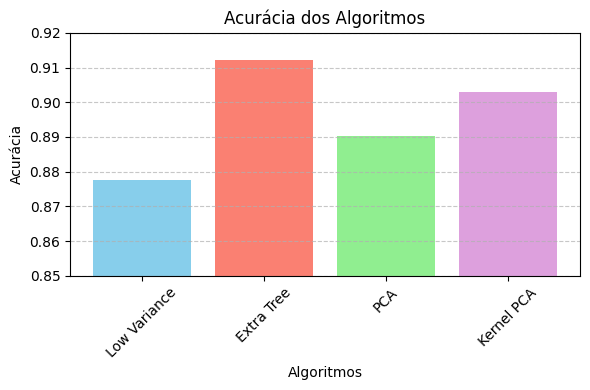

In [ ]:
import matplotlib.pyplot as plt

# Dados
algoritmos = ['Low Variance', 'Extra Tree', 'PCA', 'Kernel PCA']
acuracia = [0.877742946708464, 0.9122257053291536, 0.890282131661442, 0.9028213166144201]

# Cores para cada algoritmo
cores = ['skyblue', 'salmon', 'lightgreen', 'plum']

# Criar o gráfico
plt.figure(figsize=(6, 4))
plt.bar(algoritmos, acuracia, color=cores)

# Adicionar título e rótulos
plt.title('Acurácia dos Algoritmos')
plt.xlabel('Algoritmos')
plt.ylabel('Acurácia')

# Mostrar o gráfico
plt.ylim(0.85, 0.92)  # ajustar o intervalo do eixo y para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
